# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [53]:
# hide warnings all-time
import warnings
warnings.filterwarnings('ignore')

In [54]:
# import libraries

# The fundamentals 
import pandas as pd
import numpy as np 

# Load data 
from sqlalchemy import create_engine

# Plot data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

# Text 
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download(['punkt','stopwords', 'wordnet', 'averaged_perceptron_tagger'])
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

# ML models 
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import FunctionTransformer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [55]:
# load data from database
engine = create_engine('sqlite:///Project2.db')
df = pd.read_sql("SELECT * FROM Message_category", engine)

df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df['related'].value_counts()

1    19906
0     6122
2      188
Name: related, dtype: int64

In [57]:
df = df[df['related'] != 2].reset_index(drop = True)

In [58]:
X = df['message']
Y = df.drop(columns = {'id', 'message', 'original', 'genre'})

In [59]:
Y.describe()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
count,26028.000000,26028.000000,26028.000000,26028.000000,26028.000000,26028.000000,26028.000000,26028.000000,26028.000000,26028.0,...,26028.000000,26028.000000,26028.000000,26028.000000,26028.00000,26028.000000,26028.000000,26028.000000,26028.000000,26028.000000
mean,0.764792,0.171892,0.004534,0.417243,0.080068,0.050446,0.027816,0.018096,0.033041,0.0,...,0.011872,0.044222,0.280352,0.082795,0.09386,0.010834,0.094321,0.020363,0.052866,0.194982
std,0.424137,0.377294,0.067180,0.493113,0.271403,0.218867,0.164449,0.133301,0.178748,0.0,...,0.108311,0.205591,0.449180,0.275578,0.29164,0.103525,0.292281,0.141240,0.223771,0.396195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1b. Exploratory data analysis 

In [60]:
print("Total number of messages = ",len(df))
print("Total labels = ",df.iloc[:,4:].sum().sum())

Total number of messages =  26028
Total labels =  82947


In [61]:
x=df.iloc[:,4:].sum().sort_values(ascending= False) 
x

related                   19906
aid_related               10860
weather_related            7297
direct_report              5075
request                    4474
other_aid                  3446
food                       2923
earthquake                 2455
storm                      2443
shelter                    2314
floods                     2155
medical_help               2084
infrastructure_related     1705
water                      1672
other_weather              1376
buildings                  1333
medical_products           1313
transport                  1201
death                      1194
other_infrastructure       1151
refugees                    875
military                    860
search_and_rescue           724
money                       604
electricity                 532
cold                        530
security                    471
clothing                    405
aid_centers                 309
missing_people              298
hospitals                   283
fire    

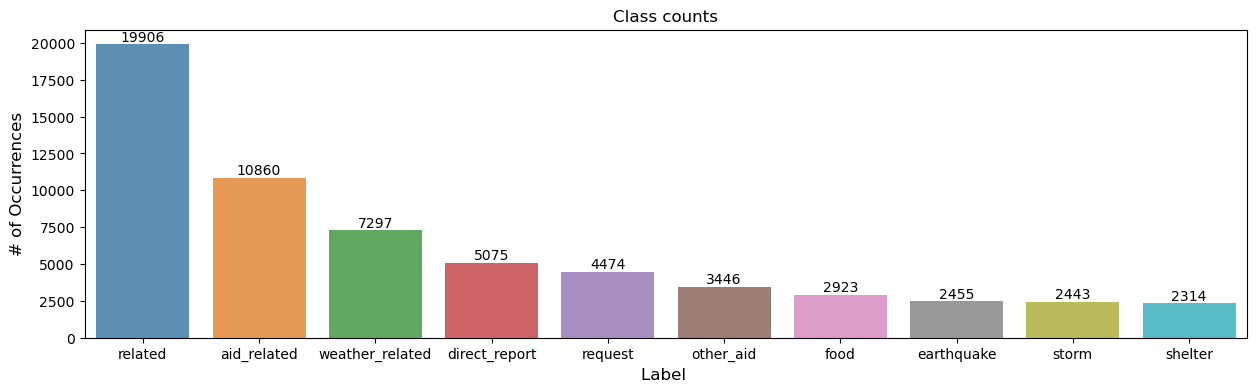

In [62]:
x=df.iloc[:,4:].sum().sort_values(ascending= False) [0:10]
plt.figure(figsize=(15,4))
ax= sns.barplot(x = x.index, y = x.values, alpha=0.8)
plt.title("Class counts")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Label ', fontsize=12)

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

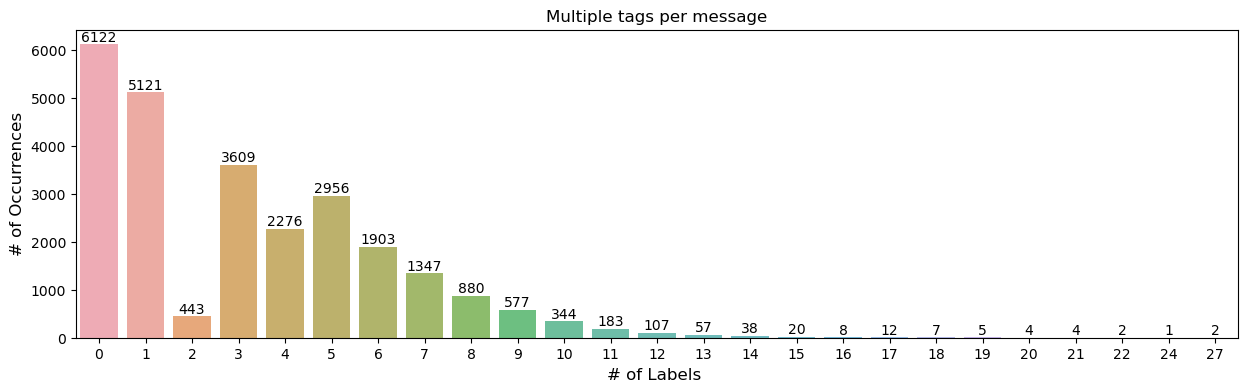

In [63]:
x = df.iloc[:,4:].sum(axis = 1).value_counts().sort_index()
plt.figure(figsize=(15,4))
ax = sns.barplot(x = x.index, y = x.values, alpha=0.8)
plt.title("Multiple tags per message")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of Labels ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [64]:
print(f'The percentage of messages with no tag is: {len(df[df.iloc[:,4:].sum(axis = 1)==0])*100/len(df):.2f}%') 

The percentage of messages with no tag is: 23.52%


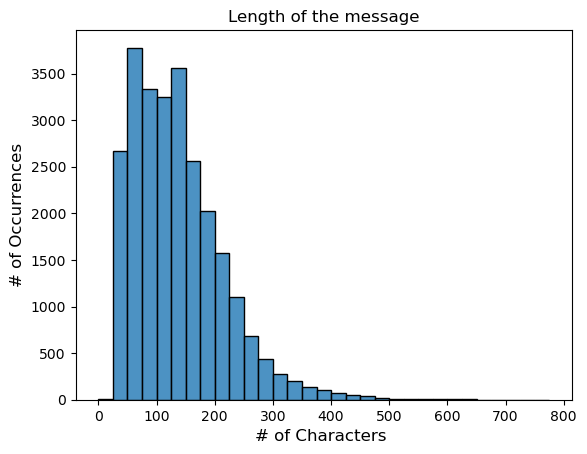

In [65]:
sns.histplot(x = df['message'].str.len(), bins = np.arange(0,800,25), alpha = 0.8)
plt.title("Length of the message")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of Characters ', fontsize=12)
plt.show()

### 2. Write a tokenization function to process your text data

In [66]:
def tokenize(text):
    # normalize case and remove punctuation
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    
    # tokenize text
    tokens = word_tokenize(text)
    
    # lemmatize and remove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return tokens

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [67]:
pipeline =Pipeline([
                ('vect', CountVectorizer(tokenizer=tokenize)),
                ('tfidf', TfidfTransformer()),
                ('clf', MultiOutputClassifier(DecisionTreeClassifier())) ])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25, random_state=42)

In [69]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x000001AB47F1EAF0>)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 MultiOutputClassifier(estimator=DecisionTreeClassifier()))])

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [70]:
y_pred = pipeline.predict(X_test)

In [71]:
from sklearn.metrics import classification_report
from sklearn.metrics import hamming_loss


# Print classification report on test data
print('\n',classification_report(y_test.values, y_pred, target_names=y_test.columns.values))
print("The F1 Micro Score is: {0:.2f}".format(f1_score(y_pred, y_test, average='micro')))
print("The F1 Macro Score is: {0:.2f}".format(f1_score(y_pred, y_test, average='macro')))
print("The F1 Weighted Score is: {0:.2f}".format(f1_score(y_pred, y_test, average='weighted')))
print("The Hamming Loss Score is: {0:.2f}".format(hamming_loss(y_pred, y_test)))



                         precision    recall  f1-score   support

               related       0.85      0.87      0.86      4938
               request       0.57      0.56      0.56      1104
                 offer       0.00      0.00      0.00        26
           aid_related       0.66      0.64      0.65      2714
          medical_help       0.37      0.32      0.35       542
      medical_products       0.41      0.37      0.39       347
     search_and_rescue       0.22      0.17      0.19       192
              security       0.12      0.09      0.10       133
              military       0.44      0.32      0.37       225
           child_alone       0.00      0.00      0.00         0
                 water       0.68      0.62      0.65       430
                  food       0.71      0.73      0.72       731
               shelter       0.60      0.59      0.59       598
              clothing       0.59      0.51      0.55       101
                 money       0.40    

### 6. Try improving your model further 

We can observe that the distribution of classes between the test and train data is not consistent.

In [73]:
y_train.sum()/len(y_train)

related                   0.766764
request                   0.172635
offer                     0.004713
aid_related               0.417294
medical_help              0.078992
medical_products          0.049485
search_and_rescue         0.027253
security                  0.017315
military                  0.032529
child_alone               0.000000
water                     0.063624
food                      0.112289
shelter                   0.087905
clothing                  0.015573
money                     0.022335
missing_people            0.011782
refugees                  0.034168
death                     0.046104
other_aid                 0.133805
infrastructure_related    0.065878
transport                 0.046309
buildings                 0.049895
electricity               0.020747
tools                     0.006096
hospitals                 0.010860
shops                     0.004354
aid_centers               0.012141
other_infrastructure      0.044567
weather_related     

In [74]:
y_test.sum()/len(y_test)

related                   0.758875
request                   0.169663
offer                     0.003996
aid_related               0.417089
medical_help              0.083295
medical_products          0.053327
search_and_rescue         0.029507
security                  0.020440
military                  0.034578
child_alone               0.000000
water                     0.066083
food                      0.112341
shelter                   0.091901
clothing                  0.015522
money                     0.025818
missing_people            0.010450
refugees                  0.031966
death                     0.045182
other_aid                 0.128170
infrastructure_related    0.064392
transport                 0.045643
buildings                 0.055171
electricity               0.019517
tools                     0.006147
hospitals                 0.010911
shops                     0.005379
aid_centers               0.011065
other_infrastructure      0.043184
weather_related     

Thus, we have developed the following function that ensures a balanced split of the data.

In [75]:
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
from sklearn.utils import indexable, _safe_indexing
from sklearn.utils.validation import _num_samples
from sklearn.model_selection._split import _validate_shuffle_split
from sklearn.model_selection import train_test_split
from itertools import chain

def multilabel_train_test_split(*arrays,
                                test_size=None,
                                train_size=None,
                                random_state=None,
                                shuffle=True,
                                stratify=None):
    """
    Train test split for multilabel classification. Uses the algorithm from: 
    'Sechidis K., Tsoumakas G., Vlahavas I. (2011) On the Stratification of Multi-Label Data'.
    """
    if stratify is None:
        return train_test_split(*arrays, test_size=test_size,train_size=train_size,
                                random_state=random_state, stratify=None, shuffle=shuffle)
    
    assert shuffle, "Stratified train/test split is not implemented for shuffle=False"
    
    n_arrays = len(arrays)
    arrays = indexable(*arrays)
    n_samples = _num_samples(arrays[0])
    n_train, n_test = _validate_shuffle_split(
        n_samples, test_size, train_size, default_test_size=0.25
    )
    cv = MultilabelStratifiedShuffleSplit(test_size=n_test, train_size=n_train, random_state=123)
    train, test = next(cv.split(X=arrays[0], y=stratify))

    return list(
        chain.from_iterable(
            (_safe_indexing(a, train), _safe_indexing(a, test)) for a in arrays
        )
    )

In [81]:
X_train, X_test, y_train, y_test = multilabel_train_test_split(X,Y, test_size=0.25, random_state= 42, stratify= Y)

In [82]:
y_train.sum()/len(y_train)

related                   0.764817
request                   0.171917
offer                     0.004559
aid_related               0.418524
medical_help              0.080068
medical_products          0.050458
search_and_rescue         0.027816
security                  0.018083
military                  0.033041
child_alone               0.000000
water                     0.064239
food                      0.112289
shelter                   0.088930
clothing                  0.015573
money                     0.023206
missing_people            0.011475
refugees                  0.033605
death                     0.045899
other_aid                 0.132421
infrastructure_related    0.065007
transport                 0.046155
buildings                 0.051227
electricity               0.020440
tools                     0.006096
hospitals                 0.010860
shops                     0.004610
aid_centers               0.011885
other_infrastructure      0.044209
weather_related     

In [83]:
y_test.sum()/len(y_test)

related                   0.764715
request                   0.171815
offer                     0.004457
aid_related               0.413401
medical_help              0.080068
medical_products          0.050407
search_and_rescue         0.027816
security                  0.018134
military                  0.033041
child_alone               0.000000
water                     0.064239
food                      0.112341
shelter                   0.088827
clothing                  0.015522
money                     0.023206
missing_people            0.011372
refugees                  0.033656
death                     0.045797
other_aid                 0.132319
infrastructure_related    0.067005
transport                 0.046104
buildings                 0.051176
electricity               0.020440
tools                     0.006147
hospitals                 0.010911
shops                     0.004610
aid_centers               0.011833
other_infrastructure      0.044260
weather_related     

The partition is now balanced, which is expected to enhance the model's performance.

Additionally, we will use the ```gensim``` package to handle text cleaning and preprocessing tasks.

In [84]:
from gensim import utils
import gensim.parsing.preprocessing as gsp

filters = [
           gsp.strip_tags, 
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.strip_numeric,
           gsp.remove_stopwords, 
           gsp.strip_short, 
           gsp.stem_text
          ]

We have defined two functions for the purpose of being integrated into a ```FunctionTransformer()``` and subsequently, used in the final ```Pipeline```.

In [85]:
def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s

def clean_text_series(series): 
    return series.apply(clean_text)

In [86]:
CleanTextTransformer = FunctionTransformer(clean_text_series)

Finally, the base classifier chosen for this task is ```XGBoost```.

In [87]:
import xgboost as xgb

clf = xgb.XGBClassifier()

Now, we are ready to create the ```Pipeline```.

In [92]:
pipeline =Pipeline([('clean_text', CleanTextTransformer),
                ('vect', CountVectorizer(tokenizer=tokenize)),
                ('clf', MultiOutputClassifier(xgb.XGBClassifier())) ])

In [93]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('clean_text',
                 FunctionTransformer(func=<function clean_text_series at 0x000001AB478DE160>)),
                ('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x000001AB47F1EAF0>)),
                ('clf',
                 MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               early_...
                                                               grow_policy=None,
                                                               importance_type=None,
  

In [94]:
y_pred = pipeline.predict(X_test)

In [95]:
print('\n',classification_report(y_test.values, y_pred, target_names=y_test.columns.values))
print("The F1 Micro Score is: {0:.2f}".format(f1_score(y_pred, y_test, average='micro')))
print("The F1 Macro Score is: {0:.2f}".format(f1_score(y_pred, y_test, average='macro')))
print("The F1 Weighted Score is: {0:.2f}".format(f1_score(y_pred, y_test, average='weighted')))
print("The Hamming Loss Score is: {0:.2f}".format(hamming_loss(y_pred, y_test)))


                         precision    recall  f1-score   support

               related       0.84      0.95      0.89      4976
               request       0.81      0.51      0.63      1118
                 offer       0.00      0.00      0.00        29
           aid_related       0.78      0.68      0.73      2690
          medical_help       0.63      0.31      0.42       521
      medical_products       0.66      0.35      0.46       328
     search_and_rescue       0.69      0.18      0.29       181
              security       0.33      0.03      0.06       118
              military       0.63      0.36      0.46       215
           child_alone       0.00      0.00      0.00         0
                 water       0.77      0.67      0.72       418
                  food       0.80      0.82      0.81       731
               shelter       0.76      0.60      0.67       578
              clothing       0.71      0.54      0.61       101
                 money       0.65    

The ```XGBoost``` algorithm is efficient and its predictions are more accurate. However, we can further improve the results by utilizing ```GridSearch``` to optimize the classifier's parameters.

### 6. Improve your model
Use grid search to find better parameters. 

In [109]:
pipeline.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('clean_text',
                 FunctionTransformer(func=<function clean_text_series at 0x000001AB478DE160>)),
                ('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x000001AB47F1EAF0>)),
                ('clf',
                 MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               early_...
                                                               grow_policy=None,
                                                  

In [111]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'clf__estimator__max_depth': range (2, 10, 1),
    'clf__estimator__n_estimators': range(60, 220, 40),
    'clf__estimator__learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(pipeline, param_grid=parameters, n_jobs = -1, cv = 10)

In [112]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('clean_text',
                                        FunctionTransformer(func=<function clean_text_series at 0x000001AB478DE160>)),
                                       ('vect',
                                        CountVectorizer(tokenizer=<function tokenize at 0x000001AB47F1EAF0>)),
                                       ('clf',
                                        MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                                                      booster=None,
                                                                                      callbacks=None,
                                                                                      colsample_bylevel=None,
                                                                                      colsample_bynode=None...
                                                                           

In [113]:
grid_search.best_params_

{'clf__estimator__learning_rate': 0.1,
 'clf__estimator__max_depth': 9,
 'clf__estimator__n_estimators': 180}

In [114]:
model = grid_search.best_estimator_

### 7. Test your model

In [115]:
y_pred = model.predict(X_test)

In [116]:
print('\n',classification_report(y_test.values, y_pred, target_names=y_test.columns.values))
print("The F1 Micro Score is: {0:.2f}".format(f1_score(y_pred, y_test, average='micro')))
print("The F1 Macro Score is: {0:.2f}".format(f1_score(y_pred, y_test, average='macro')))
print("The F1 Weighted Score is: {0:.2f}".format(f1_score(y_pred, y_test, average='weighted')))
print("The Hamming Loss Score is: {0:.2f}".format(hamming_loss(y_pred, y_test)))


                         precision    recall  f1-score   support

               related       0.84      0.96      0.89      4976
               request       0.80      0.51      0.62      1118
                 offer       0.00      0.00      0.00        29
           aid_related       0.78      0.67      0.72      2690
          medical_help       0.63      0.30      0.40       521
      medical_products       0.67      0.34      0.45       328
     search_and_rescue       0.69      0.19      0.30       181
              security       0.31      0.03      0.06       118
              military       0.61      0.35      0.45       215
           child_alone       0.00      0.00      0.00         0
                 water       0.79      0.68      0.73       418
                  food       0.80      0.83      0.82       731
               shelter       0.76      0.61      0.67       578
              clothing       0.70      0.54      0.61       101
                 money       0.64    

### 8. Export your model as a pickle file

In [119]:
import joblib
joblib.dump(model, 'model_classifier.pkl')

['model_classifier.pkl']

### 9. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.